## Problem Statement  

You are given an integer $n$. Implement the operation of preparing the state $|\psi\rangle$ from the zero state on a quantum circuit $qc$ with $n$ qubits.  

The quantum state $|\psi\rangle$ is defined as:  

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0...0\rangle_n - |1...1\rangle_n).$$  

## Constraints  

- $2 \leq n \leq 15$  
- The circuit depth must not exceed $10$.  
- Global phase is ignored in judging.  
- The submitted code must follow the specified format.  

## Sample Input  

For $n = 4$, the implemented circuit $qc$ should perform the following transformation:  

$$|0000\rangle \rightarrow \frac{1}{\sqrt{2}} (|0000\rangle - |1111\rangle).$$  


In [55]:
from qiskit import QuantumCircuit


def solve(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    
    qc.h(0)
    qc.cx(control_qubit=0, target_qubit=1)
    
    for i in range(2,n-1,2):
        qc.cx(control_qubit=0, target_qubit=i)
        qc.cx(control_qubit=1, target_qubit=i+1)
        
    
    if(n%2!=0):
       qc.cx(control_qubit=0, target_qubit=n-1) 
    
        
    qc.z(0)

    return qc

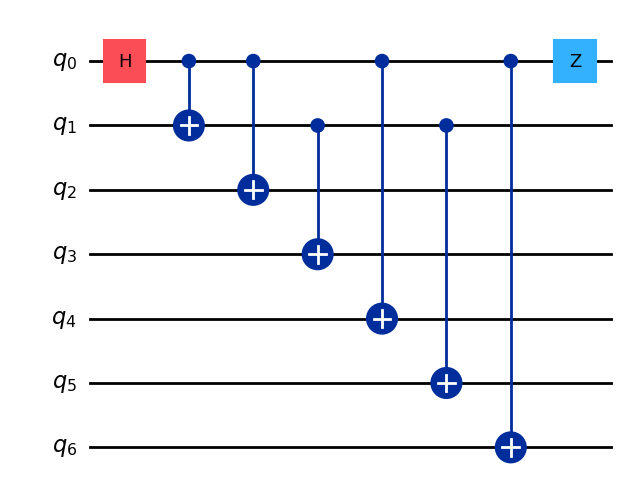

In [56]:
qc = solve(7)

qc.draw('mpl')

In [57]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Solution Approach  

To prepare the quantum state  

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0...0\rangle_n - |1...1\rangle_n),$$  

we follow these steps:  

1. **Initialize the qubits**: All qubits start in the $|0\rangle$ state.  
2. **Apply a Hadamard ($H$) gate on qubit 0**: This creates a superposition state:  

   $$\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes |0\rangle^{\otimes (n-1)}.$$  

3. **Entangle qubits using CNOT ($CX$) gates**:  
   - Apply a $CX$ gate from qubit 0 to qubit 1.  
   - For every even index $i$ (starting from 2), apply:  
     - $CX$ from qubit 0 to qubit $i$.  
     - $CX$ from qubit 1 to qubit $i+1$.  
   - If $n$ is odd, an additional $CX$ is applied from qubit 0 to qubit $(n-1)$.  

   This ensures that all qubits are entangled, forming the state:  

   $$\frac{1}{\sqrt{2}} (|00...0\rangle + |11...1\rangle).$$  

4. **Apply a $Z$ gate on qubit 0**: This introduces a phase flip on the $|11...1\rangle$ state, yielding the final desired state:  

   $$\frac{1}{\sqrt{2}} (|0...0\rangle - |1...1\rangle).$$  

## Circuit Depth Analysis  

The circuit depth is determined by the sequence of operations:

1. Hadamard gate ($H$) → Depth 1  
2. First $CX$ gate → Depth 2  
3. Loop for entanglement using $CX$ gates:
   - There are at most $\frac{n}{2} - 1$ layers due to parallel $CX$ operations.
4. Additional $CX$ for odd $n$ (if needed) → At most 1 extra depth.  
5. $Z$ gate → Depth 1  

Thus, the total depth is:  

$$\frac{n}{2} + 3.$$  

Since $n \leq 15$, the maximum depth is:  

$$\frac{15}{2} + 3 = 7.5 \approx 8 < 10.$$  

This ensures the depth constraint is always satisfied.  
